<a href="https://colab.research.google.com/github/iaguirola/HoneyBeeHealthDetection/blob/main/Healthy_vs_Varrao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Karla Ximena Alvizures Rivera

Carnet: 17001880

Nombre: Íñigo Alvarado Guirola

Carnet: 19000305

# 0) Preparations

In [ ]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix
from tensorflow.keras.utils import image_dataset_from_directory

# For dataset manipulation
from keras.preprocessing import image
import numpy as np
import pandas as pd

# Miscellaneous Libraries
import os, os.path

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE
     

# 1) Dataset

## API desde Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"iaguirola","key":"4d27fe88d273bd13019d6a2602aae88e"}'}

In [ ]:
#install kaggle
!pip install -q kaggle

#create a kaggle folder
! mkdir ~/.kaggle

#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

#permission for the json to act
!ls ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

kaggle.json


In [ ]:
#to list all datasets in kaggle

! kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          14758        396  1.0              
chitrakumari25/corona-virus-latest-data-2023              Corona virus latest data 2023                      10KB  2023-04-29 16:00:51           1330         36  1.0              
utkarshx27/starbucks-nutrition                            Starbucks Nutrition Facts                           2KB  2023-05-10 05:42:59            809         32  1.0              
utkarshx27/monthly-transportation-statistics              Monthly Transportation Statistics         

## Descargar Dataset

In [ ]:
!kaggle datasets download -d jenny18/honey-bee-annotated-images # API de la dataset desde kaggle 


 97% 49.0M/50.5M [00:01<00:00, 61.2MB/s]
100% 50.5M/50.5M [00:01<00:00, 52.3MB/s]


In [ ]:
!unzip honey-bee-annotated-images.zip -d data

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: data/bee_imgs/bee_imgs/003_250.png  
  inflating: data/bee_imgs/bee_imgs/003_251.png  
  inflating: data/bee_imgs/bee_imgs/003_252.png  
  inflating: data/bee_imgs/bee_imgs/003_253.png  
  inflating: data/bee_imgs/bee_imgs/003_254.png  
  inflating: data/bee_imgs/bee_imgs/003_255.png  
  inflating: data/bee_imgs/bee_imgs/003_256.png  
  inflating: data/bee_imgs/bee_imgs/003_257.png  
  inflating: data/bee_imgs/bee_imgs/003_258.png  
  inflating: data/bee_imgs/bee_imgs/003_259.png  
  inflating: data/bee_imgs/bee_imgs/003_260.png  
  inflating: data/bee_imgs/bee_imgs/003_261.png  
  inflating: data/bee_imgs/bee_imgs/003_262.png  
  inflating: data/bee_imgs/bee_imgs/003_263.png  
  inflating: data/bee_imgs/bee_imgs/003_264.png  
  inflating: data/bee_imgs/bee_imgs/003_265.png  
  inflating: data/bee_imgs/bee_imgs/003_266.png  
  inflating: data/bee_imgs/bee_imgs/003_267.png  
  inflating: data/bee_imgs/bee_imgs/003





## Cargar el Dataset

In [ ]:
raw_dataset = pd.read_csv("bee_data.csv", sep=",")
raw_dataset
     

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
...,...,...,...,...,...,...,...,...,...
5167,027_011.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,True,worker
5168,027_007.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,True,worker
5169,027_013.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,False,worker
5170,027_012.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,False,worker


In [ ]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

file               0
date               0
time               0
location           0
zip code           0
subspecies         0
health             0
pollen_carrying    0
caste              0
dtype: int64


,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [ ]:
new_dataset.pop("date")
new_dataset

,file,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
...,...,...,...,...,...,...,...,...
5167,027_011.png,10:03,"San Jose, CA, USA",95124,-1,healthy,True,worker
5168,027_007.png,10:03,"San Jose, CA, USA",95124,-1,healthy,True,worker
5169,027_013.png,10:03,"San Jose, CA, USA",95124,-1,healthy,False,worker
5170,027_012.png,10:03,"San Jose, CA, USA",95124,-1,healthy,False,worker


In [ ]:
new_dataset.pop("time")
new_dataset.pop("location")
new_dataset.pop("zip code")
new_dataset.pop("subspecies")
new_dataset.pop("pollen_carrying")

new_dataset

,file,health,caste
0,041_066.png,hive being robbed,worker
1,041_072.png,hive being robbed,worker
2,041_073.png,hive being robbed,worker
3,041_067.png,hive being robbed,worker
4,041_059.png,hive being robbed,worker
...,...,...,...
5167,027_011.png,healthy,worker
5168,027_007.png,healthy,worker
5169,027_013.png,healthy,worker
5170,027_012.png,healthy,worker


In [ ]:
# Check all the unique values
new_dataset["health"].unique()

array(['hive being robbed', 'healthy', 'few varrao, hive beetles',
       'ant problems', 'missing queen', 'Varroa, Small Hive Beetles'],
      dtype=object)

## Crear Directores

In [ ]:
# Setting up Macro Variables
test_split = 0.2

# Directories
base_dir = "./data/"
train_dir = base_dir + "train/"
test_dir = base_dir + "test/"
healthy_dir = base_dir + "healthy"
nonhealthy_dir = base_dir + "nonhealthy"



In [ ]:
# Creating a train and test directory
!mkdir data/train
!mkdir data/test

# Creating the classes' directories
!mkdir data/train/healthy
!mkdir data/train/nonhealthy



!mkdir data/test/healthy
!mkdir data/test/nonhealthy


!mkdir data/healthy
!mkdir data/nonhealthy


## Ordenar los archivos en sus carpetas

In [ ]:
### PROTOTIPO
###directories = ["healthy", "nonhealthy"]
###healthy_classes = ["healthy"]
###non_healthy_classes = ["few varrao, hive beetles", "Varroa, Small Hive Beetles"]

###def move_file_classes_to_directory(dataset_csv, class_to_move, directory_destination):
  
  # 1) Filter Dataset by class
 ### dataset_filtrado = raw_dataset.loc[raw_dataset["health"]=="class_to_move"]

  # 2) Iterar por cada fila y extraer nombre archivo
  ###for row in range(len(dataset_filtrado)):
      # 3) Extraer nombre del archivo
     ### nombre_img = dataset_filtrado.iloc[row]["file"]
      ###rua="./data/bee_imgs/bee_imgs/" + nombre_img
      ###enviar=base_dir+directory_destination

      # 4) Mover archivo
      ###!mv $rua $enviar

### Mover los archivos que son Healthy




In [ ]:
dataset_filtrado=new_dataset.loc[raw_dataset["health"]=="healthy"]
range(len(dataset_filtrado))

range(0, 3384)

In [ ]:
for row in range(len(dataset_filtrado)):
      # 3) Extraer nombre del archivo
      nombre_img = dataset_filtrado.iloc[row]["file"]
      print(nombre_img)
      !mv ./data/bee_imgs/bee_imgs/$nombre_img ./data/healthy/

017_029.png
017_015.png
017_001.png
017_000.png
017_014.png
017_028.png
017_002.png
017_016.png
017_017.png
017_003.png
017_007.png
017_012.png
017_006.png
017_010.png
017_004.png
017_038.png
017_039.png
017_005.png
017_011.png
017_076.png
017_062.png
017_089.png
017_102.png
017_116.png
017_117.png
017_088.png
017_063.png
017_077.png
017_049.png
017_061.png
017_075.png
017_129.png
017_115.png
017_101.png
017_100.png
017_114.png
017_128.png
017_074.png
017_060.png
017_048.png
017_064.png
017_070.png
017_058.png
017_110.png
017_104.png
017_105.png
017_111.png
017_059.png
017_071.png
017_073.png
017_067.png
017_098.png
017_107.png
017_113.png
017_106.png
017_099.png
017_066.png
017_072.png
017_057.png
017_043.png
017_094.png
017_123.png
017_122.png
017_081.png
017_095.png
017_042.png
017_056.png
017_068.png
017_054.png
017_083.png
017_097.png
017_108.png
017_120.png
017_121.png
017_109.png
017_096.png
017_082.png
017_055.png
017_041.png
017_069.png
017_045.png
017_051.png
017_079.png
017_

### Mover los archivos Nonhealthy

In [ ]:
dataset_filtrado=new_dataset.loc[raw_dataset["health"]=="few varrao, hive beetles"]
range(len(dataset_filtrado))

In [ ]:
for row in range(len(dataset_filtrado)):
      # 3) Extraer nombre del archivo
      nombre_img = dataset_filtrado.iloc[row]["file"]
      print(nombre_img)
      !mv ./data/bee_imgs/bee_imgs/$nombre_img ./data/nonhealthy/

In [ ]:
dataset_filtrado=new_dataset.loc[raw_dataset["health"]=="Varroa, Small Hive Beetles"]
range(len(dataset_filtrado))

range(0, 472)

In [ ]:
for row in range(len(dataset_filtrado)):
      # 3) Extraer nombre del archivo
      nombre_img = dataset_filtrado.iloc[row]["file"]
      print(nombre_img)
      !mv ./data/bee_imgs/bee_imgs/$nombre_img ./data/nonhealthy/

038_362.png
038_404.png
038_410.png
038_376.png
038_438.png
038_389.png
038_160.png
038_174.png
038_148.png
038_014.png
038_000.png
038_028.png
038_216.png
038_202.png
038_203.png
038_217.png
038_029.png
038_001.png
038_015.png
038_149.png
038_175.png
038_161.png
038_388.png
038_439.png
038_411.png
038_377.png
038_363.png
038_405.png
038_375.png
038_413.png
038_407.png
038_361.png
038_349.png
038_177.png
038_163.png
038_188.png
038_003.png
038_017.png
038_201.png
038_215.png
038_229.png
038_228.png
038_214.png
038_200.png
038_016.png
038_002.png
038_189.png
038_162.png
038_176.png
038_348.png
038_406.png
038_360.png
038_374.png
038_412.png
038_358.png
038_416.png
038_370.png
038_364.png
038_402.png
038_172.png
038_166.png
038_199.png
038_006.png
038_012.png
038_238.png
038_204.png
038_210.png
038_211.png
038_205.png
038_239.png
038_013.png
038_007.png
038_198.png
038_167.png
038_173.png
038_365.png
038_403.png
038_417.png
038_371.png
038_359.png
038_429.png
038_401.png
038_367.png
038_

In [ ]:
# Counting total of files in every class
for specie in ["healthy", "nonhealthy"]:
  DIR = "./data/" + specie
  print(specie, len([name for
                     name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

healthy 3384
nonhealthy 1051


## Splitting train and test

In [ ]:
# Moving files to their respective directories
for health_class in ["healthy", "nonhealthy"]:
  # Retrieving class' files
  class_files = [f for f in os.listdir(base_dir + health_class) if os.path.isfile(os.path.join(base_dir + health_class, f))]

  np.random.shuffle(class_files)

  # Splitting classes
  test, train = np.split(class_files, [int(len(class_files) * test_split)])

  new_img_path = train_dir + health_class + "/"

  # Moving all train files
  for class_img in train:
  # Building the original path to the image
    base_img_path = base_dir + health_class + "/" + class_img
    !mv $base_img_path $new_img_path

  # Building the new path to the test image
  new_img_path = test_dir + health_class + "/" 

  # Moving all test files
  for class_img in test:
    # Building the original path to the image
    base_img_path = base_dir + health_class + "/" + class_img

    !mv $base_img_path $new_img_path

## Creating the datasets

In [ ]:
# MACROVARIABLES
# Standarizing Image size
img_width = 256
img_height = 256

# Setting up image shape
channels = 3
img_shape = (img_width, img_height, channels)

# Setting up Batch size
batch_size = 64

# Setting up Class Names
class_names = ["healthy", "nonhealthy"] 
classes = len(class_names)

# Setting up seed
seed = 996633

# Setting up validation split
validation_split = 0.2

In [ ]:
# IMPORTANT: REFER TO THE DOCUMENTATION OF THE FUNCITON:
# https://www.kaggle.com/datasets/jenny18/honey-bee-annotated-images

# Creating Train Dataset
raw_train_dataset = tf.keras.utils.image_dataset_from_directory(
  # Give Directory's path
  train_dir,

  # Set to Inferred so the system automatically infers the labels
  labels='inferred',

  # (Refer to Documentation) Labels are encoded as 0 and 1
  label_mode="int",
  class_names=class_names,

  # Set to RGB since JPG images are in RGB
  color_mode="rgb",

  # Load in batches of 'batch_size'
  batch_size=batch_size,

  # Standarizes all images into the size put below
  image_size=(img_height, img_width),

  # Tells the portion of images that will belong to validation
  validation_split=validation_split,

  # Tells what kind of dataset it is creating: training or validation
  subset="training",

  # Sets the random generator seed into a custom number
  seed=seed,

  # Tells if data should be shuffled or not
  shuffle=True,
)

Found 4361 files belonging to 2 classes.
Using 3489 files for training.


In [ ]:
# Creating Validation Dataset
raw_validation_dataset = tf.keras.utils.image_dataset_from_directory(
  # Give Directory's path
  train_dir,

  # Set to Inferred so the system automatically infers the labels
  labels='inferred',

  # (Refer to Documentation) Labels are encoded as 0 and 1
  label_mode="int",
  class_names=class_names,

  # Set to RGB since JPG images are in RGB
  color_mode="rgb",

  # Load in batches of 'batch_size'
  batch_size=batch_size,

  # Standarizes all images into the size put below
  image_size=(img_height, img_width),

  # Tells the portion of images that will belong to validation
  validation_split=validation_split,

  # Tells what kind of dataset it is creating: training or validation
  subset="validation",

  # Sets the random generator seed into a custom number
  seed=seed,

  # Tells if data should be shuffled or not
  shuffle=True,
)
 

Found 4361 files belonging to 2 classes.
Using 872 files for validation.


In [ ]:
# Creating Test Dataset
raw_test_dataset = tf.keras.utils.image_dataset_from_directory(
  # Give Directory's path
  test_dir,

  # Set to Inferred so the system automatically infers the labels
  labels='inferred',

  # (Refer to Documentation) Labels are encoded as 0 and 1
  label_mode="int",
  class_names=class_names,

  # Set to RGB since JPG images are in RGB
  color_mode="rgb",

  # Load in batches of 'batch_size'
  batch_size=batch_size,

  # Standarizes all images into the size put below
  image_size=(img_height, img_width),

  # Sets the random generator seed into a custom number
  seed=seed,

  # Tells if data should be shuffled or not
  shuffle=True,
)

Found 1157 files belonging to 2 classes.


## Visualizing Data

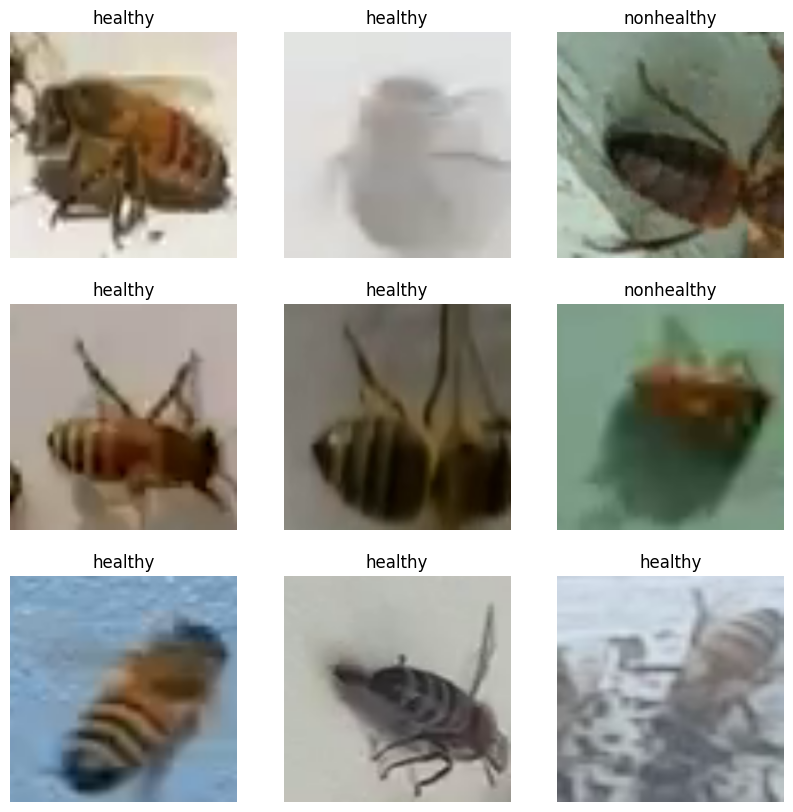

In [ ]:

plt.figure(figsize=(10, 10))
for images, labels in raw_train_dataset.take(1):
  #print(labels.numpy())
  for i in range(9):
    # Setting a graph plot for 3x3 images
    ax = plt.subplot(3, 3, i + 1)

    # Plotting the image. All images are converted to numpy and later casted to uint8
    plt.imshow(images[i].numpy().astype("uint8"))

    # Labels are converted from tensor to numpy numbers
    label = int(labels[i].numpy())
    plt.title(class_names[label])
    
    plt.axis("off")
     

# 2) Preprocessing

## Data Argumentation

In [ ]:
'''
  In order to perform data augmentation, use the layers that can alter an image, such as:
  - Random Crop
  - Random Flip
  - Random Translation
  - Random Rotation
  - Random Contrast
  - Random Brightness

  Refer to the documentation:
  https://keras.io/api/layers/preprocessing_layers/image_augmentation/

  You are manipulating an Object type of tf.data.Dataset, and it is a special datatype.
  Refer to the documentation for complex operations on them:
  https://www.tensorflow.org/api_docs/python/tf/data/Dataset
'''


random_horizontal = tf.keras.layers.RandomFlip(mode="horizontal")


flipped_train_dataset = raw_train_dataset.map(lambda x, y: (random_horizontal(x), y))


merged_train_dataset = raw_train_dataset.concatenate(flipped_train_dataset)

## Normalization

In [ ]:
# Defining the function for MinMax
minmax = tf.keras.layers.Rescaling(1./255)

# Normalizing
clean_train_dataset = merged_train_dataset.map(lambda x, y: (minmax(x), y))
clean_validation_dataset = raw_validation_dataset.map(lambda x, y: (minmax(x), y))
clean_test_dataset = raw_test_dataset.map(lambda x, y: (minmax(x), y))

## Performance Configuration

In [ ]:
# This is to take advantage of Cache and prevent I/O operations from blocking the training pipeline
AUTOTUNE = tf.data.AUTOTUNE

clean_train_dataset = clean_train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
clean_validation_dataset = clean_validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
clean_test_dataset = clean_test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# 3) AI Model

## Callbacks

In [ ]:

earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4,)

In [ ]:

checkpoint_path = "training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    save_freq='epoch'
  )

## AI Model

In [ ]:
# Lets build the model. NOTE: this is the construction of the architecture of the model!
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=img_shape),
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(3, activation="softmax")
])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Now lets train the model!
model.fit(x=clean_train_dataset,
          validation_data=clean_validation_dataset,
          epochs=100,
          callbacks=[earlystopping_callback, checkpoint_callback]
        )

Epoch 1/100
 35/110 [========>.....................] - ETA: 29:14 - loss: 8.1374 - accuracy: 0.7460

## Loading Model Weights

In [ ]:
last_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)

NameError: ignored

In [ ]:
# Loading the weights into the model
model.load_weights("training/cp-0003.ckpt")

NameError: ignored

In [ ]:
model.evaluate(clean_test_dataset)

NameError: ignored

## Confusion Matrix

In [ ]:
# Function that plots confusion matrix
def plot_confusion_matrix(labels, predictions):
  figure = plt.figure(figsize=(6, 6))
  sns.heatmap(confusion_matrix(labels=labels, predictions=predictions), annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
     

In [ ]:

# Declaring Variables
model_predictions = []
test_labels = []

for image_batch, labels_batch in clean_test_dataset:
  # Extracting images and doing predictions
  predictions = model.predict(x=image_batch)
  predictions = list(map(lambda x: np.argmax(x), predictions))

  # Extracting labels
  labels = list(map(lambda x: int(x), labels_batch.numpy()))
  
  # Appending
  model_predictions += predictions
  test_labels += labels

1/1 [==============================] - 1s 1s/step


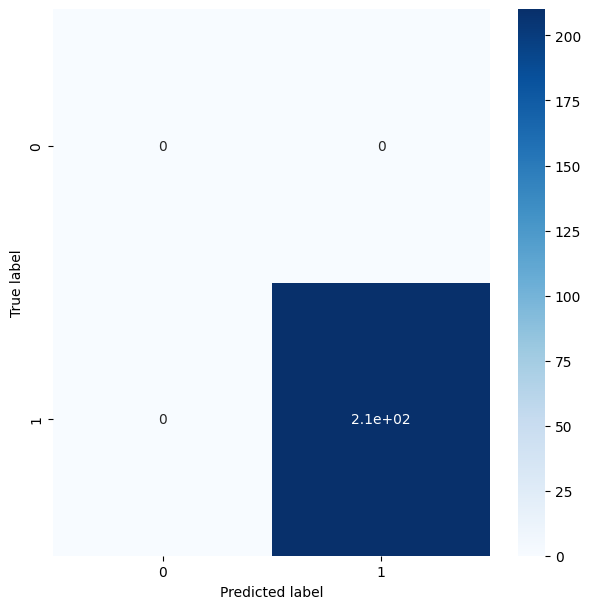

In [ ]:

# Lets plot the confusion matrix to check if there is any kind of bias
plot_confusion_matrix(labels=test_labels, predictions=model_predictions)